## Descriptive and Statistical Analysis

In [1]:
import sys
from pathlib import Path

root_dir = Path.cwd().parent  # Go one folder up from /notebooks
print("Root directory:", root_dir)

if str(root_dir) not in sys.path:
    sys.path.append(str(root_dir))

Root directory: /Users/agalyaayyadurai/Automated-Equity-Valuation


In [2]:
import pandas as pd

# Loading the financial statements of all the companies
gold_file = Path("../data/gold/financials_panel.parquet")
df_raw = pd.read_parquet(gold_file)

In [3]:
df_raw.columns.to_list()

['adsh',
 'cik',
 'name',
 'fy',
 'filed',
 'period',
 'sic',
 'industry',
 'source_zip',
 'form',
 'fp',
 'AccountsPayable',
 'AccountsReceivable',
 'CashAndCashEquivalents',
 'Goodwill',
 'Intangibles',
 'Inventory',
 'OtherNoncurrentLiabilities',
 'PPandE',
 'RetainedEarnings',
 'ShareholdersEquity',
 'TotalAssets',
 'TotalCurrentAssets',
 'TotalCurrentLiabilities',
 'TotalNoncurrentAssets',
 'TreasuryStock',
 'IncomeTaxExpense',
 'NetIncome',
 'OperatingExpenses',
 'OtherIncomeExpense',
 'RND',
 'Revenue',
 'SGA',
 'CFF',
 'CFI',
 'CFO',
 'CapEx',
 'DepAmortCF',
 'EquityIssuance',
 'IncomeTaxesPaid',
 'ShareRepurchase',
 'StockBasedComp',
 'CommonSharesIssued',
 'WASOBasic',
 'WASODiluted',
 'bs_balanced_flag',
 'cf_delta_abs',
 'cf_balanced_flag',
 'coverage_score',
 'TotalLiabilities',
 'CostOfRevenue',
 'GrossProfit',
 'InterestExpense',
 'OperatingIncome',
 'DebtRepayment',
 'bs_diff',
 'LongTermDebt',
 'OtherCurrentLiabilities',
 'ShortTermDebt',
 'ShortTermInvestments',
 'Dep

In [8]:
# Keeping the necessary columns

relevant_cols = [
    'cik','name','fy','filed','period','sic','industry','form','fp',
    'Revenue','CostOfRevenue','GrossProfit','OperatingIncome','OperatingExpenses',
    'InterestExpense','IncomeTaxExpense','NetIncome','SGA','RND',
    'CFO','CFI','CFF','CapEx','DepAmortCF','ShareRepurchase','DebtIssuance',
    'DebtRepayment','EquityIssuance','IncomeTaxesPaid','InterestPaid','ProceedsFromSalePPE','StockBasedComp',
    'TotalAssets','TotalLiabilities','ShareholdersEquity','TotalCurrentAssets','TotalCurrentLiabilities', 'OtherCurrentLiabilities',
    'ShortTermDebt','LongTermDebt','CashAndCashEquivalents','PPandE','Inventory','Goodwill','Intangibles','RetainedEarnings',
    'CommonSharesOutstanding','WASOBasic','WASODiluted', 'AccountsReceivable', 'ChangeInAR', 'AccountsPayable', 'ChangeInAP', 
    'ChangeInInventory', 'ChangeInAccruedLiabilities', 'ChangeInDeferredRevenue', 'ChangeInPrepaidAndOther'
]

df = df_raw[relevant_cols]
df.to_csv("financials_corecols.csv")

In [7]:
df.columns.to_list()

['cik',
 'name',
 'fy',
 'filed',
 'period',
 'sic',
 'industry',
 'form',
 'fp',
 'Revenue',
 'CostOfRevenue',
 'GrossProfit',
 'OperatingIncome',
 'OperatingExpenses',
 'InterestExpense',
 'IncomeTaxExpense',
 'NetIncome',
 'SGA',
 'RND',
 'CFO',
 'CFI',
 'CFF',
 'CapEx',
 'DepAmortCF',
 'ShareRepurchase',
 'DebtIssuance',
 'DebtRepayment',
 'EquityIssuance',
 'IncomeTaxesPaid',
 'InterestPaid',
 'ProceedsFromSalePPE',
 'StockBasedComp',
 'TotalAssets',
 'TotalLiabilities',
 'ShareholdersEquity',
 'TotalCurrentAssets',
 'TotalCurrentLiabilities',
 'OtherCurrentLiabilities',
 'ShortTermDebt',
 'LongTermDebt',
 'CashAndCashEquivalents',
 'PPandE',
 'Inventory',
 'Goodwill',
 'Intangibles',
 'RetainedEarnings',
 'CommonSharesOutstanding',
 'WASOBasic',
 'WASODiluted',
 'Inventory',
 'AccountsReceivable',
 'ChangeInAR',
 'AccountsPayable',
 'ChangeInAP',
 'ChangeInInventory',
 'ChangeInAccruedLiabilities',
 'ChangeInDeferredRevenue',
 'ChangeInPrepaidAndOther']

In [48]:
# keeping only annual 10-K FY rows
df = df[(df['form'] == '10-K') & (df['fp'].str.upper() == 'FY')].copy()
df['form'].nunique()

1

In [49]:
# Inventory
print("Rows:", len(df))
print("Companies:", df['cik'].nunique())
print("Years:", int(df['fy'].min()), "→", int(df['fy'].max()))

Rows: 85225
Companies: 13421
Years: 2004 → 2025


In [51]:
# check for number of negative values in columns that should take only postiive values
non_negative_cols = [
    'TotalAssets',
    'TotalLiabilities',
    'TotalCurrentAssets',
    'TotalCurrentLiabilities',
    'CashAndCashEquivalents',
    'Inventory',
    'PPandE',
    'Goodwill',
    'Intangibles',
    'CommonSharesOutstanding',
    'WASOBasic',
    'WASODiluted'
]
neg_counts = (df[non_negative_cols] < 0).sum().sort_values(ascending=False)
neg_ratio = (df[non_negative_cols] < 0).mean().sort_values(ascending=False) * 100

neg_summary = pd.DataFrame({
    "NegativeCount": neg_counts,
    "NegativePct": neg_ratio.round(2)
})

print(neg_summary)

                         NegativeCount  NegativePct
TotalAssets                       1442         1.69
TotalCurrentLiabilities            436         0.51
TotalCurrentAssets                 292         0.34
TotalLiabilities                   256         0.30
CommonSharesOutstanding             22         0.03
CashAndCashEquivalents              18         0.02
Goodwill                            17         0.02
PPandE                               6         0.01
Intangibles                          5         0.01
WASOBasic                            4         0.00
Inventory                            3         0.00
WASODiluted                          3         0.00


In [52]:
# fixing the negative values by takign the absolute value for such columns
cols_to_fix = [
    'TotalAssets', 'TotalLiabilities', 'TotalCurrentAssets',
    'TotalCurrentLiabilities', 'CommonSharesOutstanding',
    'CashAndCashEquivalents', 'Goodwill', 'PPandE', 'Intangibles',
    'Inventory', 'WASOBasic', 'WASODiluted'
]

for col in cols_to_fix:
    df[col] = df[col].abs()


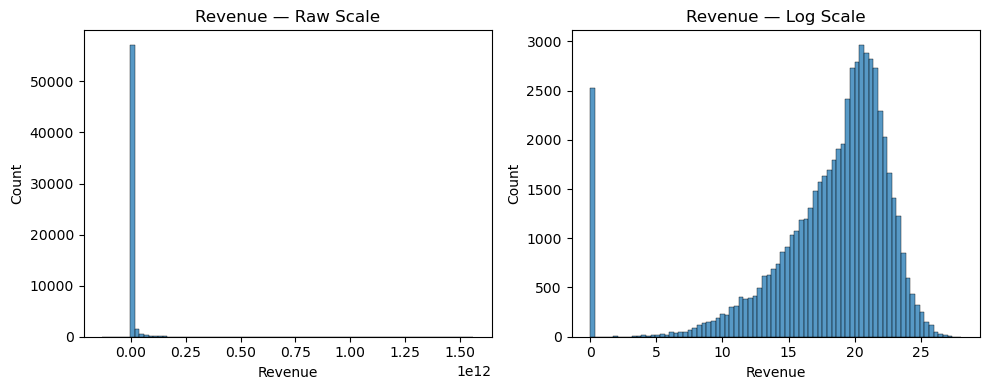

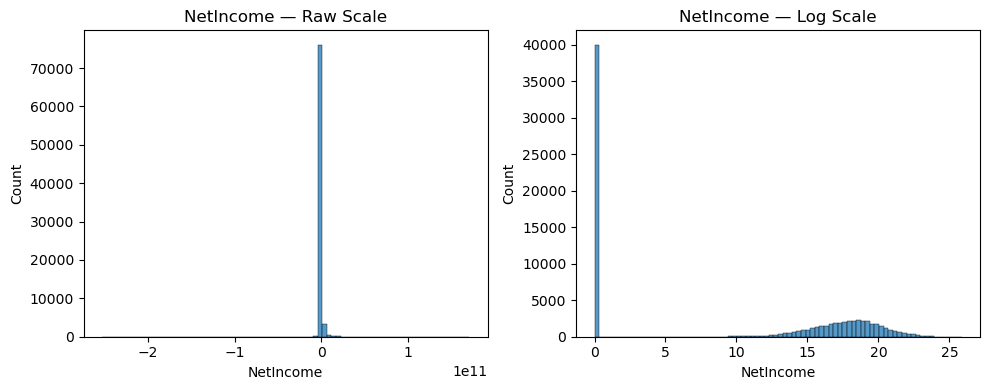

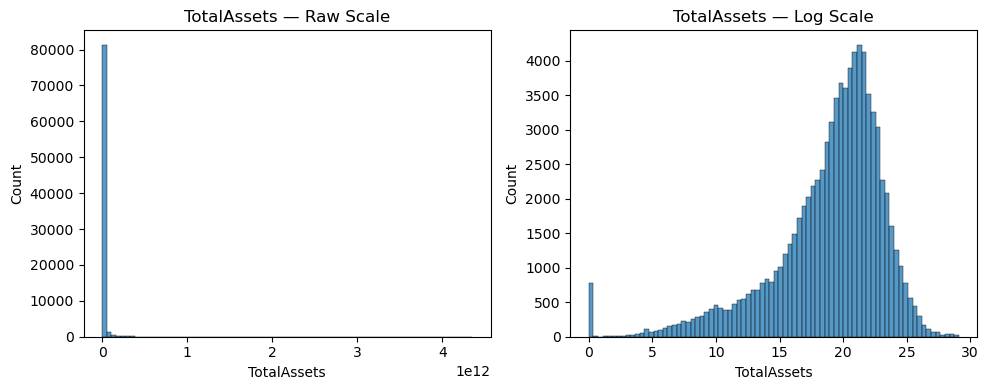

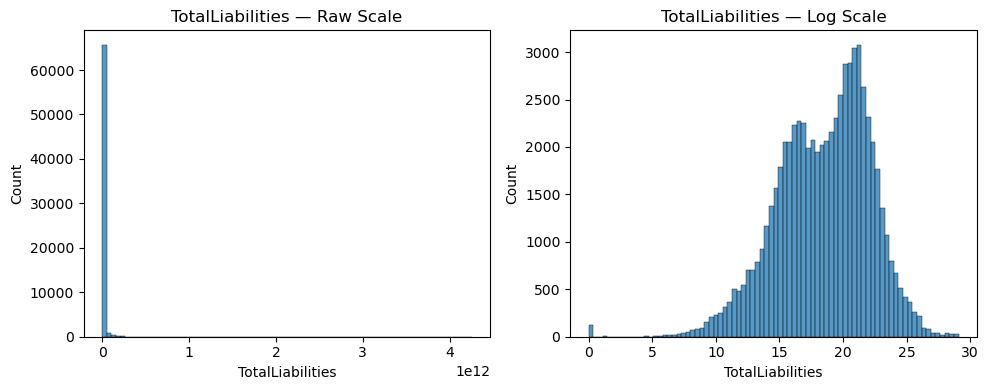

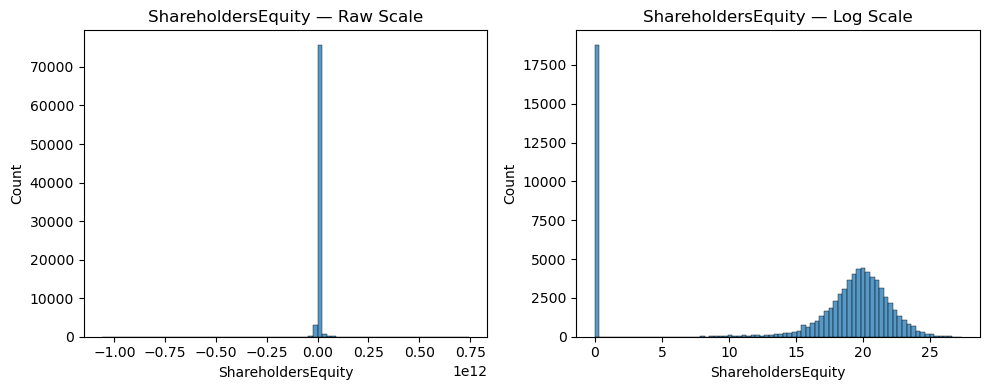

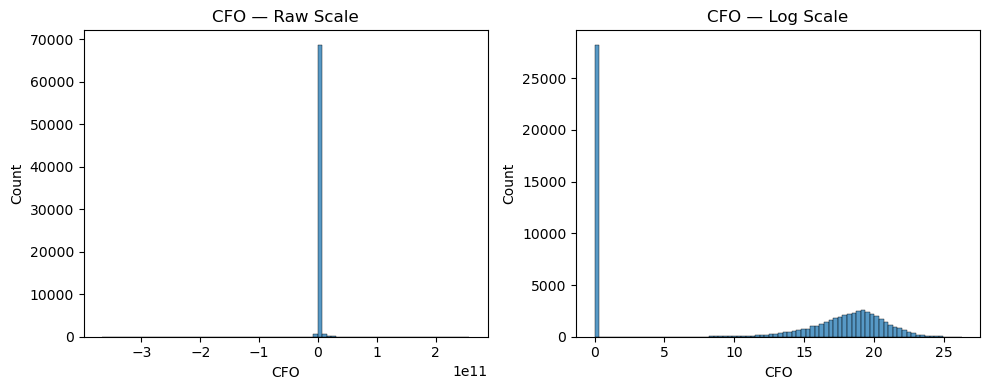

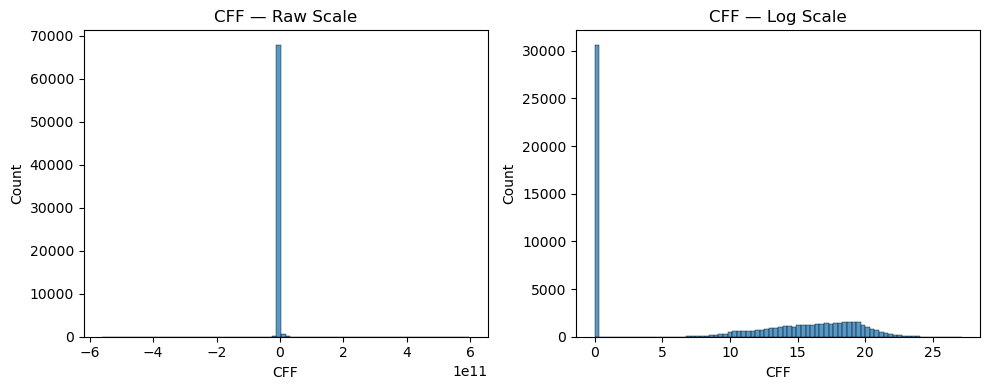

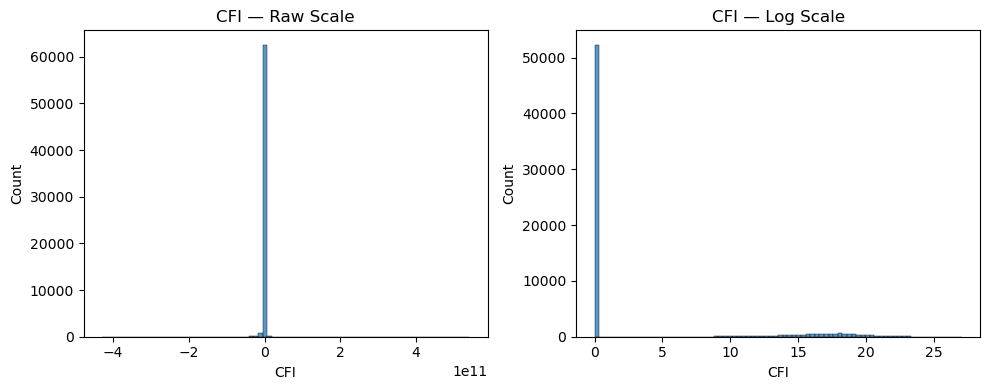

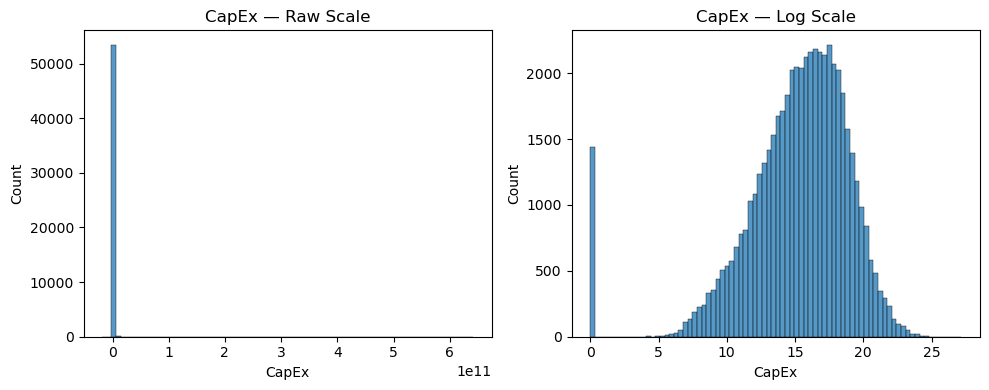

In [56]:
# Visualising distributiosn for the first 9 main columns

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#sample_df = df.sample(n=5000, random_state=42)
sample_df = df # for the whole data
core_cols = ['Revenue', 'NetIncome', 'TotalAssets', 'TotalLiabilities', 
             'ShareholdersEquity', 'CFO', 'CFF', 'CFI', 'CapEx']

for col in core_cols:
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    sns.histplot(sample_df[col], bins=80, ax=axes[0], kde=False)
    axes[0].set_title(f"{col} — Raw Scale")
    
    sns.histplot(np.log1p(sample_df[col].clip(lower=0)), bins=80, ax=axes[1], kde=False)
    axes[1].set_title(f"{col} — Log Scale")
    
    plt.tight_layout()
    plt.show()


In [43]:
# checking the numerical summary
import scipy.stats as stats

desc_core = pd.DataFrame({
    'Mean': df[core_cols].mean(),
    'Median': df[core_cols].median(),
    'Skewness': df[core_cols].apply(lambda x: stats.skew(x.dropna())),
    'Kurtosis': df[core_cols].apply(lambda x: stats.kurtosis(x.dropna()))
})
print(desc_core.round(2))


                            Mean       Median  Skewness  Kurtosis
Revenue             3.995137e+09  272252000.0     23.43   1114.02
NetIncome           2.157554e+08      11869.5     -1.00   2067.82
TotalAssets         1.123426e+10  430203000.0     25.26    781.63
TotalLiabilities    9.451123e+09  163358000.0     25.35    765.12
ShareholdersEquity  1.768376e+09  184821771.0      2.38    876.90
CFO                 4.933679e+08    7917000.0      2.48   2204.78
CFF                -1.277663e+08      78931.0    -15.96   2847.73
CFI                -3.547792e+08  -16700000.0     26.29   2520.18
CapEx               1.904572e+08    6562000.0    189.75  40904.38


#### Interpreting the Numerical Summary

| Column                        | Mean vs Median                           | Skewness | Kurtosis  | Interpretation                                                                                                         |
| ----------------------------- | ---------------------------------------- | -------- | --------- | ---------------------------------------------------------------------------------------------------------------------- |
| **Revenue**                   | Mean ≫ Median                            | +23      | 1114      | Huge positive skew (few gigantic firms pulling mean up — e.g., Apple, Exxon). Log-transform strongly recommended.      |
| **NetIncome**                 | Mean ≫ Median but slightly negative skew | -1.0     | 2068      | Long left tail — some large loss years. Keep raw for now, but consider log-transforming positive/negative separately.  |
| **TotalAssets / Liabilities** | Mean ≫ Median                            | +25      | ~780      | Classic “firm size” skewness — a few mega-caps. Use log-transform.                                                     |
| **ShareholdersEquity**        | Mild positive skew                       | +2.4     | 877       | Moderate skew + heavy tails. Winsorize or log-transform positive values. Keep negatives as-is.                         |
| **CFO (Operating Cash Flow)** | Mean ≫ Median                            | +2.5     | 2205      | Skewed right — typical because large profitable firms dominate. Log-transform can help normalize scale.                |
| **CFF (Financing Cash Flow)** | Negative mean, large negative skew       | -16      | 2848      | Big negative tails — debt repayments/share buybacks. Better to analyze distributions separately for inflow vs outflow. |
| **CFI (Investing Cash Flow)** | Negative mean, strong positive skew      | +26      | 2520      | Many firms spend on investments (outflows), but few report massive inflows. Needs scaling or winsorization.            |
| **CapEx**                     | Mean ≫ Median                            | +190     | 40,000 😳 | Extreme right tail — dominated by a handful of heavy industries. Strong case for log-transform or winsorization.       |


In [57]:
'''Identify & handle extremes (Winsorization)
Winsorization trims outliers without deleting them
e.g. capping all values beyond the 99th percentile to that percentile.'''

from scipy.stats.mstats import winsorize

for col in ['CapEx', 'ShareholdersEquity', 'CFF', 'CFI']:
    df[col] = winsorize(df[col], limits=[0.01, 0.01])  # trims top/bottom 1%


In [60]:
# Apply log transformations 

import numpy as np

df['Revenue_log'] = np.log1p(df['Revenue'].clip(lower=0))
df['TotalAssets_log'] = np.log1p(df['TotalAssets'].clip(lower=0))
df['TotalLiabilities_log'] = np.log1p(df['TotalLiabilities'].clip(lower=0))
df['CFO_log'] = np.log1p(df['CFO'].clip(lower=0))
df['CapEx_log'] = np.log1p(df['CapEx'].clip(lower=0))

In [61]:
# Checkign skew values after transformation
df[['Revenue_log','TotalAssets_log','TotalLiabilities_log','CFO_log','CapEx_log']].skew()

Revenue_log            -1.854711
TotalAssets_log        -1.438295
TotalLiabilities_log   -0.549976
CFO_log                -0.264994
CapEx_log              -1.418399
dtype: float64

In [ ]:
# Working on the next ten main columns
import numpy as np

# columns that shouldn't be negative
no_negative = [
    'GrossProfit','InterestExpense','SGA','RND',
    'DepAmortCF','LongTermDebt','CashAndCashEquivalents'
]

# Replace negative values with NaN (treat as invalid entries)
for col in no_negative:
    neg_count = (df[col] < 0).sum()
    if neg_count > 0:
        print(f"⚠️ {col}: {neg_count} negative values replaced with NaN")
    df.loc[df[col] < 0, col] = np.nan


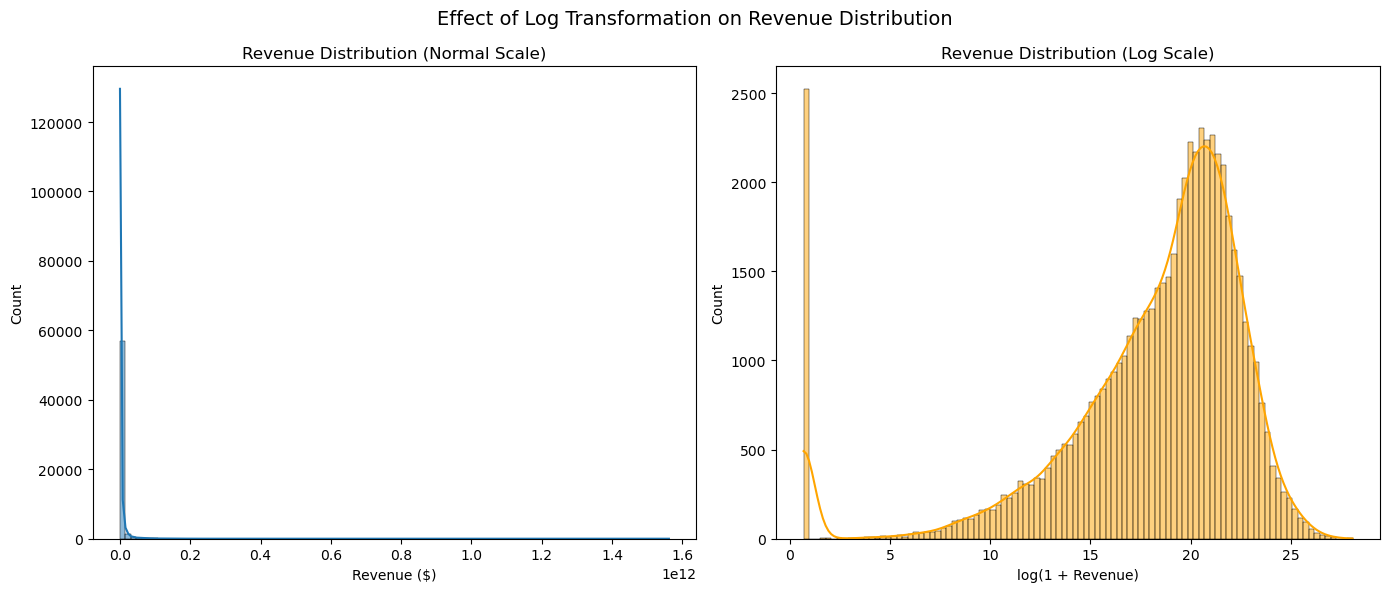

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣  Clean and prepare
# Avoid negatives or zeros before log transform
df_clean = df.copy()
df_clean['Revenue_clipped'] = df_clean['Revenue'].clip(lower=1)

# 2️⃣  Compute log-transformed values
df_clean['Revenue_log'] = np.log1p(df_clean['Revenue_clipped'])

# 3️⃣  Plot both
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- Normal Scale ---
sns.histplot(df_clean['Revenue_clipped'], bins=100, kde=True, ax=axes[0])
axes[0].set_title("Revenue Distribution (Normal Scale)")
axes[0].set_xlabel("Revenue ($)")

# --- Log Scale ---
sns.histplot(df_clean['Revenue_log'], bins=100, kde=True, color='orange', ax=axes[1])
axes[1].set_title("Revenue Distribution (Log Scale)")
axes[1].set_xlabel("log(1 + Revenue)")

plt.suptitle("Effect of Log Transformation on Revenue Distribution", fontsize=14)
plt.tight_layout()
plt.show()

,Mean,Median,Skewness,Kurtosis
WASOBasic,6206176608.74,44073655.0,214.137,46452.588
WASODiluted,5883686845.646,46533000.0,212.311,45108.485
EquityIssuance,81571339.846,1500000.0,198.884,41656.832
CapEx,186082702.091,6164000.0,192.787,42304.367
StockBasedComp,68775841.443,5469000.0,180.424,34070.79
CommonSharesOutstanding,11608248083.657,38117517.0,165.11,29215.289
Goodwill,1793112434.265,143920500.0,126.812,17018.878
DebtRepayment,549372936.118,5545078.5,95.207,12755.914
LongTermDebt,3106955962.948,412584000.0,62.801,6353.287
InterestExpense,137423894.507,3412000.0,38.893,1763.661


,Mean,Median,Skewness,Kurtosis
Intangibles,625228234.266,33755000.0,11.734,187.282
TotalCurrentAssets,1337495580.309,109659930.0,7.813,366.524
IncomeTaxExpense,100680662.109,3015951.0,6.717,617.756
TotalCurrentLiabilities,967911540.98,39203500.0,4.416,514.949
CFO,473956824.128,5588349.0,2.584,2299.97
ShareholdersEquity,1761891573.079,183003000.0,2.391,881.128
sic,4867.646,4924.0,-0.141,-1.055
NetIncome,214689049.54,3667.0,-1.001,2077.728
CFF,-120808649.427,104000.0,-16.366,2995.85
OperatingIncome,318802980.741,-22341.0,-161.261,35910.934


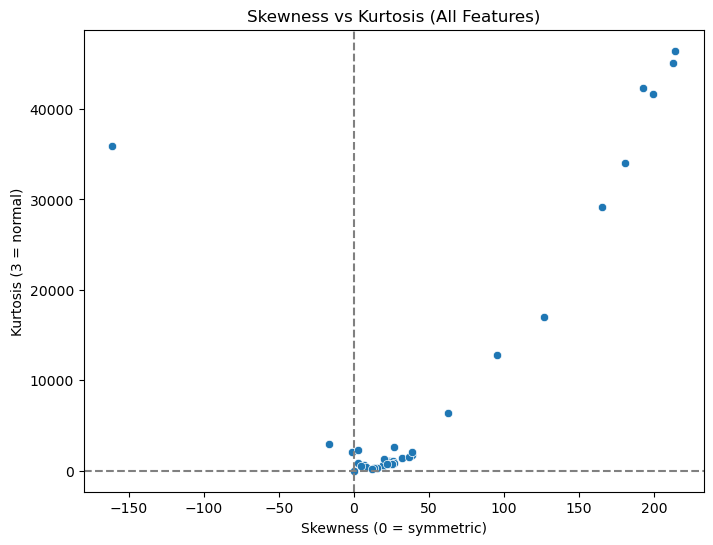

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# --- Choosing numeric columns only ---
num_cols = df.select_dtypes(include=[np.number]).columns

# --- Computing descriptive stats ---
desc_stats = pd.DataFrame({
    "Mean": df[num_cols].mean(),
    "Median": df[num_cols].median(),
    "Skewness": df[num_cols].skew(),
    "Kurtosis": df[num_cols].kurt()
}).round(3)

# --- Sorting by Skewness to spot most asymmetric columns ---
desc_stats_sorted = desc_stats.sort_values("Skewness", ascending=False)
display(desc_stats_sorted.head(10))   # top 10 most skewed
display(desc_stats_sorted.tail(10))   # least skewed

# --- Optional visualization: Skew vs Kurtosis scatter ---
plt.figure(figsize=(8,6))
sns.scatterplot(x="Skewness", y="Kurtosis", data=desc_stats)
plt.axvline(0, color='gray', ls='--')
plt.axhline(3, color='gray', ls='--')
plt.title("Skewness vs Kurtosis (All Features)")
plt.xlabel("Skewness (0 = symmetric)")
plt.ylabel("Kurtosis (3 = normal)")
plt.show()
